In [1]:
import argparse
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

from data import get_training_data, get_testing_data
from logistic_regression import classification_rate, logistic_fit, logistic_prob

In [2]:
def plot_errors(predicted, classes):
    nthresh = 99
    npts = predicted.size
    falsepos = np.zeros(nthresh)
    falseneg = np.zeros(nthresh)

    stepsize = 1 / (nthresh + 1)

    for i in range(nthresh):
        thresh = (i+1) * stepsize
        falsepos[i] = np.sum((predicted >= thresh) & (classes == 0)) / npts
        falseneg[i] = np.sum((predicted < thresh) & (classes == 1)) / npts

    limit = 1e-4
    plt.loglog(np.maximum(falsepos, limit), np.maximum(falseneg, limit), 'o')
    plt.title('Performance on training set for varying threshold')
    plt.xlabel('False positive rate')
    plt.ylabel('False negative rate')
    plt.xlim([limit,1])
    plt.ylim([limit,1])
    plt.show()

In [9]:
ntrain = 6000
ntest = 500
orientations = 9
wrap180 = False

In [10]:
sys.stdout.write("Loading training data...\n")
sys.stdout.flush()
descriptors_train, classes_train = get_training_data(ntrain, orientations, wrap180=wrap180)
sys.stdout.write("Finished loading training data.\n")
sys.stdout.flush()
sys.stdout.write("Loading test data...\n")
sys.stdout.flush()
descriptors_test, classes_test = get_testing_data(ntest, orientations, wrap180=wrap180)
sys.stdout.write("Finished loading test data.\n")
sys.stdout.flush()

Loading training data...


100% (12000 of 12000) |###################| Elapsed Time: 0:02:27 Time: 0:02:27


Finished loading training data.
Loading test data...


100% (1000 of 1000) |#####################| Elapsed Time: 0:00:08 Time: 0:00:08


Finished loading test data.


Start training...
error at iter 0: 0.08834287851576673
error at iter 0: 0.02141089526157428
error at iter 0: 0.009410364266384651
error at iter 0: 0.006481394917885981
error at iter 0: 0.005455049614982676
error at iter 0: 0.004892932806541851
Training took 33.90128993988037 seconds.


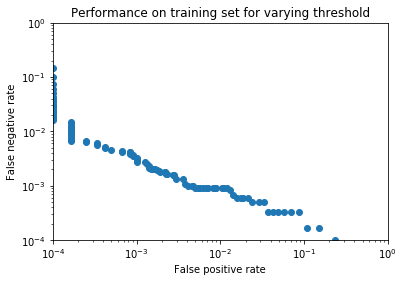

Training classification rate: 0.9963333333333333


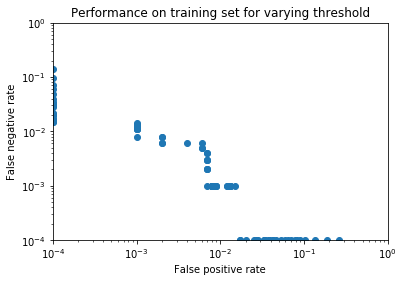

Testing classification rate: 0.991


In [11]:
print("Start training...")
start_time = time.time()
params, _ = logistic_fit(descriptors_train, classes_train)
print("Training took {} seconds.".format(time.time()-start_time))

predicted_train = logistic_prob(descriptors_train, params)
plot_errors(predicted_train, classes_train)

train_success_rate = classification_rate(predicted_train, classes_train)
print("Training classification rate: {}".format(train_success_rate))

predicted_test = logistic_prob(descriptors_test, params)
plot_errors(predicted_test, classes_test)

test_success_rate = classification_rate(predicted_test, classes_test)
print("Testing classification rate: {}".format(test_success_rate))